In [26]:
pip install python-binance


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from binance.client import Client
import pandas as pd

### Collect dataset

In [2]:
api_key = 'kaSdgDnLu7oKM7vjMVr9qVmoPVBxJ58HRAQqvabouYnNvlCKEhRTyRtOUeDRkpUK'
api_secret = 'pJJZYfpM1k4T3Wk1XZfasiIsGs1eEdBNObCdLlXZ6pnKnJ0Ulul0KYgyGradZHiY'
client = Client(api_key, api_secret)

symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR

candles = []
for i in range(30):
    start_time = 1556463999 + 1500*3600*i # April 6, 2023, 23:59:59 (UTC)

    candles += client.futures_klines(symbol=symbol, interval=interval, startTime=start_time * 1000,  limit=1500)


df = pd.DataFrame(candles, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])

# Extract the relevant columns and convert them to appropriate data types
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

# Set the 'Open time' column as the DataFrame's index
df.set_index('Open time', inplace=True)

df

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002,1567965599999,20,2,0.001,10,0
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000,1567969199999,0,0,0,0,0
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659,1567972799999,4879792.35614,562,0,0,0
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271,1567976399999,6037732.62590,731,0.034,351.97117,0
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759,1567979999999,7136798.50523,827,0.004,41.38500,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 16:00:00,26884.20,27180.00,26780.00,27080.90,37865.362,1685638799999,1021832609.74285,256698,20143.400,543737263.65445,0
2023-06-01 17:00:00,27080.80,27130.00,26908.00,26947.90,30525.759,1685642399999,824005680.05780,261524,14494.865,391258812.34020,0
2023-06-01 18:00:00,26947.90,27043.30,26929.10,26960.50,11107.724,1685645999999,299730041.60300,103969,5852.431,157923903.83360,0


In [3]:
prices = df[['Open', 'High','Low','Close']].replace({',':''}, regex=True).astype(np.float64)
prices

,Open,High,Low,Close
Open time,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90
...,...,...,...,...
2023-06-01 16:00:00,26884.20,27180.00,26780.00,27080.90
2023-06-01 17:00:00,27080.80,27130.00,26908.00,26947.90
2023-06-01 18:00:00,26947.90,27043.30,26929.10,26960.50


In [4]:
predicted_prices = prices['Close'][1:]
data = prices.copy()[:-1]
data['target'] = np.int32( np.array(predicted_prices)>=data['Close'] ) #whether price will go up or down
data

,Open,High,Low,Close,target
Open time,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,1
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,1
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,1
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,1
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,0
...,...,...,...,...,...
2023-06-01 15:00:00,26887.90,26939.90,26844.20,26884.20,1
2023-06-01 16:00:00,26884.20,27180.00,26780.00,27080.90,0
2023-06-01 17:00:00,27080.80,27130.00,26908.00,26947.90,1


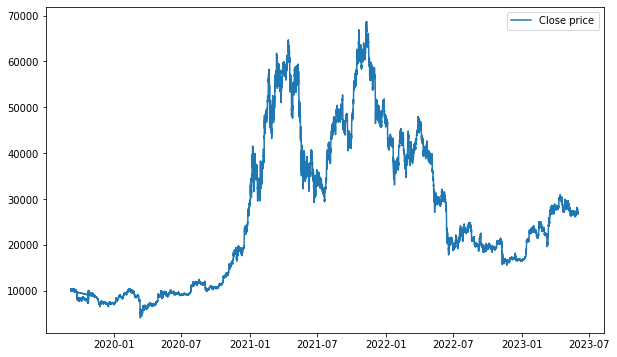

In [5]:
plt.figure(figsize=(10,6))

plt.plot(data['Close'], label='Close price')
plt.legend()

In [6]:
import gudhi
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

class predictor:
    def __init__(self, data, k = 20, max_dim=2, threshold=3):
        self.max_dim = max_dim
        self.k = k
        self.threshold = threshold
        self.R = np.linspace(0, threshold, k)
        self.images = []

        # Define the model architecture
        model = tf.keras.Sequential([
            layers.Reshape((k, k, 1), input_shape=(k, k)),  # Reshape input to (20, 20, 1)
            layers.Conv2D(4, 3, activation='relu'),           # Convolutional layer with 16 filters
            layers.MaxPooling2D(2),                            # Max pooling layer
            layers.Flatten(),                                  # Flatten the output
            layers.Dense(12, activation='relu'),               # Dense layer with 32 units
            layers.Dense(1, activation='sigmoid')              # Output layer with sigmoid activation
        ])

        # Compile the model
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
        self.model = model

    def persistent_analysis(self, data):
        rips_complex = gudhi.RipsComplex(points=data)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=self.max_dim)
        diag = simplex_tree.compute_persistence()
        simplices = list(simplex_tree.get_simplices())
        simplices = [i for i in simplices if i[1]<self.threshold]
        simplices.sort(key=lambda x: x[1])
        simplices = simplices[len(data):]
        return simplices
    
    def analysis_to_image(self, simplices):
        i = 0
        image = np.zeros((len(self.R), self.k))
        for j in range(len(simplices)):
            if self.R[i+1]<simplices[j][1]:
                i+=1
            d = len( simplices[j][0] )
            for point in simplices[j][0]:
                image[i][point] += d
        return image
    
    def fit(self, data, epochs=5):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        self.X = np.array(X)
        self.images += [self.analysis_to_image(self.persistent_analysis(x)) for x in X]
        self.model.fit( np.array(self.images), y, epochs=epochs)

    def predict(self, data):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        X = np.array(X)
        X = np.array([self.analysis_to_image(self.persistent_analysis(x)) for x in X])

        return self.model.predict(  X, y )
    
    def evaluate(self, data):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        X = np.array(X)
        X = np.array([self.analysis_to_image(self.persistent_analysis(x)) for x in X])
        return self.model.evaluate(X,y)
  

model = predictor(data, k=30, max_dim=2, threshold=4)

n = int(0.9*len(data))
TRAIN, TEST  = data[:n], data[n:]
model.fit(TRAIN, epochs = 10)

model.evaluate(TEST)

Epoch 1/10
1009/1009 [==============================] - 10s 8ms/step - loss: 0.6997 - accuracy: 0.5012
Epoch 2/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6932 - accuracy: 0.5016
Epoch 3/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 4/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6922 - accuracy: 0.5171
Epoch 5/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6900 - accuracy: 0.5266
Epoch 6/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6866 - accuracy: 0.5365
Epoch 7/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6822 - accuracy: 0.5501
Epoch 8/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6764 - accuracy: 0.5625
Epoch 9/10
1009/1009 [==============================] - 8s 8ms/step - loss: 0.6696 - accuracy: 0.5739
Epoch 10/10
112/112 [==============================] - 1s 5ms/step - loss: 0.7181

[0.7181341648101807, 0.4929775297641754]

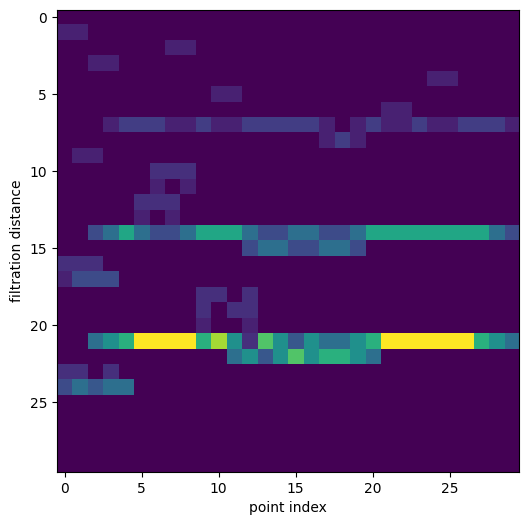

In [151]:
plt.figure(figsize= (6,6) )
plt.ylabel('filtration distance')
plt.xlabel('point index')
plt.imshow( model.images[0] )

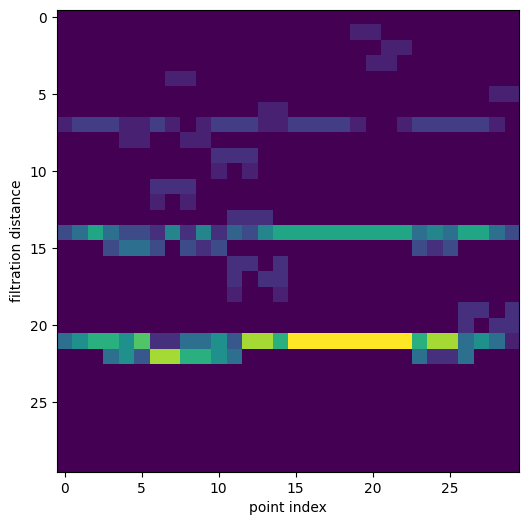

In [152]:
plt.figure(figsize= (6,6) )
plt.ylabel('filtration distance')
plt.xlabel('point index')
plt.imshow( model.images[-1] )

# try logistic regression

In [32]:
n = int(0.9*len(data))
cols = ['Open', 'High', 'Low', 'Close']
x_train, x_test, y_train, y_test  = data[:n][cols], data[n:][cols], data[:n][['target']], data[n:][['target']]

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_sc, y_train)
predictions = logisticRegr.predict(x_test_sc)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5135135135135135

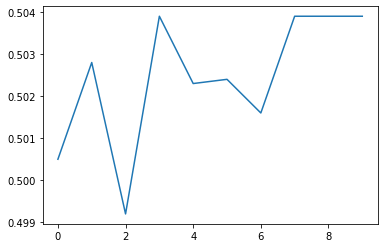

In [8]:
losses = [0.7074, 0.6932, 0.6932, 0.6932, 0.6932, 
          0.6931, 0.6931, 0.6931, 0.6932, 0.6931]

acc = [0.5005, 0.5028, 0.4992, 0.5039, 0.5023, 
       0.5024, 0.5016, 0.5039, 0.5039, 0.5039]


plt.plot(acc, label='accuracy')

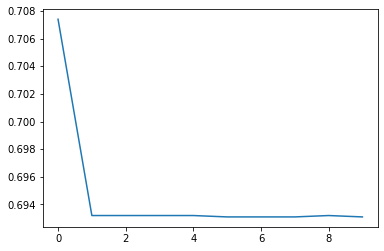

In [9]:
plt.plot(losses, label='loss')